# NAME : B VIJAY RAMAN

#### E-MAIL ID : ramanvijay2878@gmail.com

# **Data analysis**


**1. Download the dataset (fashion_mnist)**

In [2]:
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

(trainX,trainy),(testX,testy)=fashion_mnist.load_data()


**2. Loading the dataset (fashion_mnist)**

In [3]:
(trainX,trainy),(testX,testy)=fashion_mnist.load_data()

def load_dataset():
    (trainX,trainy),(testX,testY)=fashion_minst.load_data()
    trainX=trainX.reshape((trainX.shape[0],28,28,1))
    testX=testX.reshape((testX.shape[0],28,28,1))
    
    trainy=to_categorical(trainy)
    testY=to_categorical(testY)
    
    return trainX,trainy,testX,testY

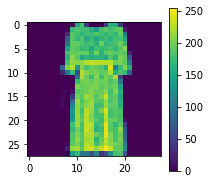

Image (#1902): Which is label number '3', or label 'Dress''


In [4]:
#Sample image
import matplotlib.pyplot as plt
import random

labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 1902 
each = trainX[sample]

plt.figure(figsize=(3,3))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,trainy[sample], labelNames[trainy[sample]]))


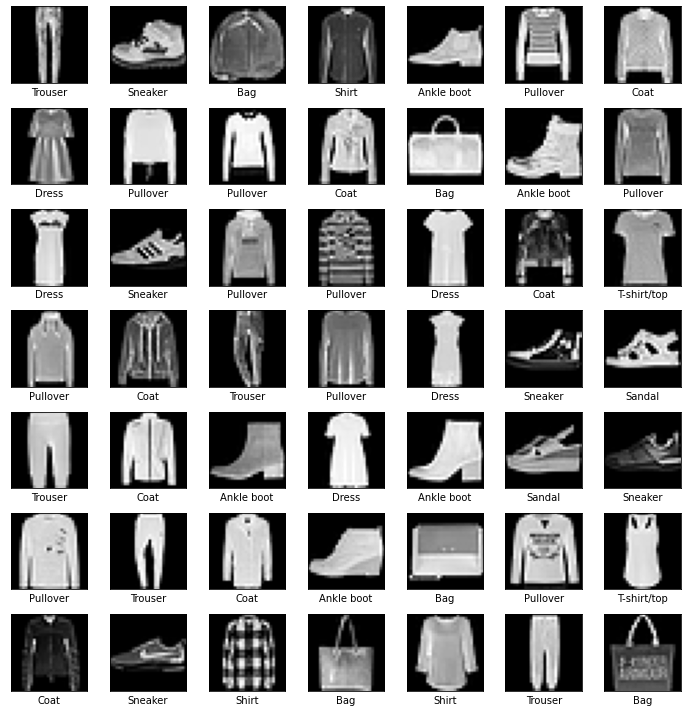

In [5]:
#Sample images
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(0, len(trainX)+1)
    image = trainX[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[trainy[temp]])
    plt.tight_layout()   

**3. Subset Generation ( StratifiedShuffleSplit is used to split the dataset )**

In [6]:
seed=9

from sklearn.model_selection import StratifiedShuffleSplit
data_split=StratifiedShuffleSplit(test_size=0.03,random_state=seed)
for train_index , test_index in data_split.split(trainX,trainy):
    split_data_92,split_data_8 = trainX[train_index],trainX[test_index]
    split_label_92,split_label_8 = trainy[train_index],trainy[test_index]
    
train_test_split=StratifiedShuffleSplit(test_size=0.3,random_state=seed)

**4. Data Splitting**

* 70% of dataset for training data
* 60% of dataset for test data

In [7]:
for train_index, test_index in train_test_split.split(split_data_8,split_label_8):
    train_data_70, test_data_30 = split_data_8[train_index], split_data_8[test_index]
    train_label_70, test_label_30 = split_label_8[train_index], split_label_8[test_index]
    
train_data=train_data_70
train_labels=train_label_70
test_data=test_data_30
test_labels=test_label_30

print('train_data : ',train_data.shape)
print('train_labels : ',train_labels.shape)
print('test_data : ',test_data.shape)
print('test_label : ',test_labels.shape)

train_data :  (1260, 28, 28)
train_labels :  (1260,)
test_data :  (540, 28, 28)
test_label :  (540,)


# **Data pre-processing**

#### Some Data pre-processing techniques we discussed are :
* Normalization
* ZCA Whitening
* Principal Component Analysis(PCA)
* Singular Value Decomposition(SVD)

In [8]:
# Normalization

import numpy as np
    
def normalize(data,eps=1e-8):
    data -= data.mean(axis=(0,1,2),keepdims=True)
    std = np.sqrt(data.var(axis=(0,1,2),ddof=1,keepdims=True))
    std[std<eps] = 1
    data /= std
    return data

train_data=train_data.astype('float64')
test_data=test_data.astype('float64')

train_data = normalize(train_data)
test_data = normalize(test_data)

print('train_data : ',train_data.shape)
print('test_data : ',test_data.shape)

train_data :  (1260, 28, 28)
test_data :  (540, 28, 28)


In [9]:
# ZCA Whitening

train_data_flat = train_data.reshape(train_data.shape[0],-1).T
test_data_flat = test_data.reshape(test_data.shape[0],-1).T
print('train_data_flat : ',train_data_flat.shape)
print('test_data_flat : ',test_data_flat.shape)

train_data_flat_t = train_data_flat.T 
test_data_flat_t = test_data_flat.T 

train_data_flat :  (784, 1260)
test_data_flat :  (784, 540)


In [10]:
# Principal Component Analysis(PCA)

from sklearn.decomposition import PCA

train_data_pca = PCA(n_components=train_data_flat.shape[0]).fit_transform(train_data_flat)
test_data_pca = PCA(n_components=test_data_flat.shape[1]).fit_transform(test_data_flat)

print(train_data_pca.shape)
print(test_data_pca.shape)

train_data_pca = train_data_pca.T
test_data_pca = test_data_pca.T

(784, 784)
(784, 540)


In [11]:
# Singular Value Decomposition(SVD)

from skimage import color

def svdFeatures(input_data):
    svdArray_input_data=[]
    size = input_data.shape[0]
    
    for i in range(0,size):
        img = color.rgb2gray(input_data[i])
        U,s,V=np.linalg.svd(img, full_matrices=False);
        S=[s[i] for i in range(28)]
        svdArray_input_data.append(S)
        svdMatrix_input_data=np.matrix(svdArray_input_data)
    return svdMatrix_input_data

train_data_svd = svdFeatures(train_data)
test_data_svd = svdFeatures(test_data)

print(train_data_svd.shape)
print(test_data_svd.shape)

<ipython-input-11-8b4a950c05b0>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = color.rgb2gray(input_data[i])


(1260, 28)
(540, 28)


## **Classification Algorithms**

#### The algorithms we will discussed here are :
* Support vector machines (SVMs) Classifiers
* Naive Bayes Classifiers
* Multi-Layer Perceptron (MLP)

#### Support vector machines (SVMs) Classifier model

In [12]:
#SVM model is derived from Normalization, ZCA Whitening
from sklearn import svm

clf = svm.SVC(gamma=.001,probability=True)
clf.fit(train_data_flat_t,train_labels)

predicted = clf.predict(test_data_flat_t)
score_SVM_NOR_ZCA= clf.score(test_data_flat_t,test_labels)
print("score : ",score_SVM_NOR_ZCA)

score :  0.7796296296296297


In [13]:
#SVM model is derived from Principal Component Analysis(PCA)
from sklearn import svm

clf = svm.SVC(gamma=.001,probability=True)
clf.fit(train_data_flat_t,train_labels)

predicted = clf.predict(test_data_pca)
score_SVM_PCA= clf.score(test_data_pca,test_labels)
print("score : ",score_SVM_PCA)

score :  0.09814814814814815


In [14]:
#SVM model is derived from Singular Value Decomposition(SVD)
from sklearn import svm

clf = svm.SVC(gamma=.001,probability=True)
clf.fit(train_data_svd,train_labels)

predicted = clf.predict(test_data_svd)
score_SVM_SVD= clf.score(test_data_svd,test_labels)
print("score : ",score_SVM_SVD)

score :  0.3962962962962963


#### Naive Bayes Classifiers

In [15]:
#Naive Bayes Classifiers is derived from Normalization, ZCA Whitening
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
train = gnb.fit(train_data_flat_t,train_labels)

y_pred = gnb.predict(test_data_flat_t)
score_NB_NOR_ZCA = gnb.score(test_data_flat_t,test_labels)
print("score : ",score_NB_NOR_ZCA)

score :  0.17222222222222222


In [16]:
#Naive Bayes Classifiers is derived from Principal Component Analysis(PCA)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
train = gnb.fit(train_data_flat_t,train_labels)

y_pred = gnb.predict(test_data_pca)
score_NB_PCA = gnb.score(test_data_pca,test_labels)
print("score : ",score_NB_PCA)

score :  0.09259259259259259


In [17]:
#Naive Bayes Classifiers is derived from Singular Value Decomposition(SVD)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
train = gnb.fit(train_data_svd,train_labels)

y_pred = gnb.predict(test_data_svd)
score_NB_SVD = gnb.score(test_data_svd,test_labels)
print("score : ",score_NB_SVD)

score :  0.26666666666666666


#### Multi-Layer Perceptron (MLP)

In [18]:
#Multi-Layer Perceptron (MLP) is derived from Normalization, ZCA Whitening
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

MLP = MLPClassifier()
MLP.fit(train_data_flat_t,train_labels)

mlp_predict = MLP.predict(test_data_flat_t)
score_MLP_NOR_ZCA = MLP.score(test_data_flat_t,test_labels)
print("score : ",score_MLP_NOR_ZCA)

score :  0.8314814814814815


In [19]:
#Multi-Layer Perceptron (MLP) is derived from Principal Component Analysis(PCA)
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

MLP = MLPClassifier()
MLP.fit(train_data_flat_t,train_labels)

mlp_predict = MLP.predict(test_data_pca)
score_MLP_PCA = MLP.score(test_data_pca,test_labels)
print("score : ",score_MLP_PCA)

score :  0.1


In [20]:
#Multi-Layer Perceptron (MLP) is derived from Singular Value Decomposition(SVD) 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

MLP = MLPClassifier()
MLP.fit(train_data_svd,train_labels)

mlp_predict = MLP.predict(test_data_svd)
score_MLP_SVD = MLP.score(test_data_svd,test_labels)
print("score : ",score_MLP_SVD)

score :  0.5351851851851852


C:\Users\Rajaraman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


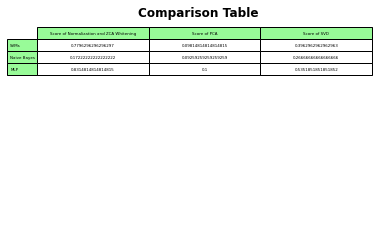

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = [[score_SVM_NOR_ZCA,score_SVM_PCA,score_SVM_SVD],
      [score_NB_NOR_ZCA,score_NB_PCA,score_NB_SVD],
      [score_MLP_NOR_ZCA,score_MLP_PCA,score_MLP_SVD]],  
    rowLabels = ["SVMs","Naive Bayes","MLP"],  
    colLabels = ["Score of Normalization and ZCA Whitening","Score of PCA","Score of SVD"], 
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc ='center',  
    loc ='upper left')         
   
ax.set_title('Comparison Table', fontweight ="bold")   
plt.show() 


## Conclusion

### From the Comparison table, we conclude that:
1. By using Normalization and ZCA Whitening as a data pre-processing we see that Multi-Layer Perceptron (MLP) is a good Classification Algorithm.
2. By using  Principal Component Analysis(PCA) as a data pre-processing we see that Support vector machines (SVMs) Classifier is a good Classification Algorithm.
3. By using Singular Value Decomposition(SVD) as a data pre-processing we see that Multi-Layer Perceptron (MLP) is a good Classification Algorithm.

## ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````